## Imports

In [5]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import sys
import time
import typing as t
from pprint import pprint
from datetime import datetime, timedelta, date

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib_venn import venn2, venn3, venn3_circles
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import display, clear_output, HTML
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
matplotlib.rcParams['figure.figsize'] = (7, 7)
sns.set_style('whitegrid')

## Scoring theoretical tests

In [13]:
main_scores_table_columns_renaming = {
    "фио": "fio",
    "группа": "group"
}
pprint(main_scores_table_columns_renaming)

{'группа': 'group', 'фио': 'fio'}


In [15]:
# main_scores_table = pd.read_clipboard()
main_scores_table.columns = [main_scores_table_columns_renaming.get(col.lower(), col.lower()) for col in main_scores_table.columns]
main_scores_table = (
    main_scores_table
    .loc[
        (~main_scores_table['fio'].isnull())
    ]
    .reset_index(drop=True)
)
print(f"main_scores_table: {main_scores_table.shape[0]:,} x {main_scores_table.shape[1]:,}")
main_scores_table.head()

main_scores_table: 62 x 28


,fio,group,практическая: оптимизация (основные баллы),практическая: оптимизация (black_box min val),практическая: оптимизация (бонусные баллы),практическая: оптимизация (основные баллы + доп),проверочная: метрические методы,проверочная: деревья,практическая: деревья (основные баллы),практическая: деревья (бонусные баллы),...,проверочная: метрические методы (переписывание),проверочная: деревья (переписывание),проверочная: линейные методы (переписывание),проверочная: обучение без учителя (переписывание),проверочная: ансамбли (переписывание),проверочная: нейронные сети (переписывание),соревнование 4,практическая: рекомендательный системы (основные баллы),unnamed: 26,unnamed: 27
0,Котиков Павел,э203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ардеев Артём,э301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Бабенков Ярослав,э301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Баранов Ярослав,э301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Барановский Герман,э301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
theoretical_test_columns_renaming = {
    "фио": "fio",
    "группа": "group"
}
pprint(theoretical_test_columns_renaming)

In [163]:
TheoreticalTestTable = pd.DataFrame
"""
Отметка времени	Адрес электронной почты	Баллы	Фамилия<пробел>Имя (ТОЧЬ-В-ТОЧЬ как в таблице с баллами)	Группа (ТОЧЬ-В-ТОЧЬ как в таблице с баллами)	Какого из данных параметров НЕТ в KNeighborsClassifier (sklearn)?	Соберите код для определения оптимального числа соседей на кросс валидации для KNeighborsClassifier	На каком рисунке изображена поверхность решения, соответствующая модели KNN с числом n_neighbors равным 1?	Ответ дайте в виде десятичной дроби, округлённой до 3 знака после точки. (Не забудьте нормировать веса)	Определите для каждой картинки значения параметра p (в метрике Минковского). Порядок p в ответе совпадает с порядком нумерации картинок	Рисунок 1 (эта картинка нужна для вопроса ниже)	На рисунке 1 изображены двумерные объекты (матрица Х в коде ниже)(числа - соответствующие индексы этих объектов). Что будет напечатано в результате выполнения кода ниже? (метрика cityblock = manhattan)	Имеется 2 предложения: text1 = "На дворе трава, на траве дрова", text2 = "Не руби дрова на траве двора". На картинке предложения уже лемматизированы (слова приедены к начальной форме: траве -> трава, руби -> рубить и тд) и для предложений сделаны BOW (bag of words) представления. В итоге каждому предложению сопоставлен вектор состоящий из числа вхождений конкретного слова в это предложение (картинка ниже). Посчитайте косинусное расстояние (1 - cos(.)) между text1 и text2. Ответ округлите до 3 знаков после точки	Вставьте отсюда значение The Current Epoch Unix Timestamp (как в примере на картинке) (только выделенное число, без seconds since ...)	Вставьте отсюда значение The Current Epoch Unix Timestamp (как в примере на картинке) (только выделенное число, без seconds since ...).1
0	10.10.2020 8:56:02	anastkostr@gmail.com	5 / 11	Кострова Анастасия	403	bagging_fraction	3 2 7 1 6 5 4	1	NaN	p < 1, p = 1, 1 <= p <= 2, p > 2	NaN	NaN	0.685	NaN	NaN
1	10.10.2020 8:57:24	Demonukropa1999@yandex.ru	0 / 11	Емельянова Софья	Э-406	weights	3 2 7 1 4 5 6	3	NaN	p = 0.5, p = 2, p = 3, p = 1	NaN	5.0	0,775	NaN	NaN
2	10.10.2020 8:58:24	agaevanarmina99@gmail.com	8 / 11	Агаева Нармина	403	bagging_fraction	3 2 7 1 6 5 4	1	4.391	p < 1, p = 1, 1 <= p <= 2, p > 2	NaN	4.0	0.225	NaN	NaN
3	10.10.2020 8:58:51	sokol1901.00@gmail.com	4 / 11	Колесник Софья	405	bagging_fraction	3 2 7 1 6 5 4	4	3.333	p < 0, p = 1, 1 <= p <= 2, p > 2	NaN	8.0	0.775	NaN	NaN
4	10.10.2020 8:59:13	tima2201@mail.ru	7 / 11	Пугоев Тимур	405	bagging_fraction	3 2 7 1 6 5 4	1	4.167	p < 1, p = 1, 1 <= p <= 2, p > 2	NaN	4.0	0.775	NaN	NaN
...
"""

def theoretical_test_table_normalize_maybe_process_name_column(
    theoretical_test_df: TheoreticalTestTable,
    normalized_column_name: str = 'name',
    process_column: bool = True
) -> TheoreticalTestTable:
    column_nonprocessed = [col for col in theoretical_test_df.columns if 'фамилия' in col.lower()]
    assert len(column_nonprocessed) > 0, (
        "Ни одна из колонок не подпадает под определение колонки с именем!"
        f" theoretical_test_df.columns={theoretical_test_df.columns}"
    )
    column_nonprocessed = column_nonprocessed[0]
    
    theoretical_test_df.columns = [(col if col != column_nonprocessed else normalized_column_name) for col in theoretical_test_df.columns]
    if process_column:
        theoretical_test_df[normalized_column_name] = theoretical_test_df[normalized_column_name].apply(lambda name: str(name).strip())
    return theoretical_test_df

def theoretical_test_table_normalize_maybe_process_group_column(
    theoretical_test_df: TheoreticalTestTable,
    normalized_column_name: str = 'group',
    process_column: bool = True
) -> TheoreticalTestTable:
    column_nonprocessed = [col for col in theoretical_test_df.columns if 'группа' in col.lower()]
    assert len(column_nonprocessed) > 0, (
        "Ни одна из колонок не подпадает под определение колонки с группой!"
        f" theoretical_test_df.columns={theoretical_test_df.columns}"
    )
    column_nonprocessed = column_nonprocessed[0]
    
    theoretical_test_df.columns = [(col if col != column_nonprocessed else normalized_column_name) for col in theoretical_test_df.columns]
    if process_column:
        theoretical_test_df[normalized_column_name] = theoretical_test_df[normalized_column_name].apply(lambda x: str(x).lower().strip())
    return theoretical_test_df

def theoretical_test_table_normalize_maybe_process_score_column(
    theoretical_test_df: TheoreticalTestTable,
    normalized_column_name: str = 'score',
    process_column: bool = True
) -> TheoreticalTestTable:
    column_nonprocessed = [col for col in theoretical_test_df.columns if 'балл' in col.lower()]
    assert len(column_nonprocessed) > 0, (
        "Ни одна из колонок не подпадает под определение колонки с баллами!"
        f" theoretical_test_df.columns={theoretical_test_df.columns}"
    )
    column_nonprocessed = column_nonprocessed[0]
    
    theoretical_test_df.columns = [(col if col != column_nonprocessed else normalized_column_name) for col in theoretical_test_df.columns]
    if process_column:
        theoretical_test_df[normalized_column_name] = theoretical_test_df[normalized_column_name].apply(lambda x: float(str(x).split('/')[0].strip())).astype(float)
    return theoretical_test_df

def _convert_end_time_string_to_datetime(date_string: str) -> datetime:
    return datetime.strptime(date_string, "%d.%m.%Y %H:%M:%S")


def theoretical_test_table_normalize_maybe_process_end_time_column(
    theoretical_test_df: TheoreticalTestTable,
    normalized_column_name: str = 'end_time',
    process_column: bool = True
) -> TheoreticalTestTable:
    column_nonprocessed = [col for col in theoretical_test_df.columns if 'отметка времени' in col.lower()]
    assert len(column_nonprocessed) > 0, (
        "Ни одна из колонок не подпадает под определение колонки c отметкой времени завершения"
        f" theoretical_test_df.columns={theoretical_test_df.columns}"
    )
    column_nonprocessed = column_nonprocessed[0]
    
    theoretical_test_df.columns = [(col if col != column_nonprocessed else normalized_column_name) for col in theoretical_test_df.columns]
    if process_column:
        end_date_processed = []
        for date_str in theoretical_test_df[normalized_column_name].values:
            try:
                end_date_processed.append(_convert_end_time_string_to_datetime(str(date_str)))
            except Exception as e:
                # print("Failed to _convert_end_time_string_to_datetime!")
                # print(e, end='\n'*2)
                end_date_processed.append(_convert_end_time_string_to_datetime('01.01.1970 00:00:00'))
                
        theoretical_test_df[normalized_column_name] = end_date_processed
    return theoretical_test_df


def _convert_start_time_int_to_datetime(unix_timestamp: int) -> datetime:
    return datetime.fromtimestamp(unix_timestamp)

def theoretical_test_table_normalize_maybe_process_start_time_column(
    theoretical_test_df: TheoreticalTestTable,
    normalized_column_name: str = 'start_time',
    process_column: bool = True,
    global_start_time: datetime | None = None,
) -> TheoreticalTestTable:
    column_nonprocessed = [col for col in theoretical_test_df.columns if 'The Current Epoch Unix Timestamp'.lower() in col.lower()]
    assert len(column_nonprocessed) > 0, (
        "Ни одна из колонок не подпадает под определение колонки c отметкой времени начала теста!"
        f" theoretical_test_df.columns={theoretical_test_df.columns}"
    )
    column_nonprocessed = column_nonprocessed[-1] # for some reason in this case latter is correct column
    
    theoretical_test_df.columns = [(col if col != column_nonprocessed else normalized_column_name) for col in theoretical_test_df.columns]
    if process_column:
        start_date_processed = []
        for unix_timestamp in theoretical_test_df[normalized_column_name].values:
            try:
                start_datetime = _convert_start_time_int_to_datetime(int(unix_timestamp))
                if global_start_time is not None:
                    start_datetime = max(global_start_time, start_datetime)
                start_date_processed.append(start_datetime)
            except Exception as e:
                # print("Failed to _convert_start_time_int_to_datetime!")
                # print(e, end='\n'*2)
                start_date_processed.append(
                    _convert_start_time_int_to_datetime(751111111) # datetime(1993, 10, 20, 12, 58, 31)
                )
                
        theoretical_test_df[normalized_column_name] = start_date_processed
    return theoretical_test_df




In [164]:
theoretical_test_df = pd.read_clipboard()

test_start_datetime = datetime(2025, 9, 17, 21, 2, 0)
test_time_allowed_minutes: int = 15

# processing name column
theoretical_test_df = theoretical_test_table_normalize_maybe_process_name_column(
    theoretical_test_df=theoretical_test_df,
    normalized_column_name='name',
    process_column=True
)
# processing group column
theoretical_test_df = theoretical_test_table_normalize_maybe_process_group_column(
    theoretical_test_df=theoretical_test_df,
    normalized_column_name='group',
    process_column=True
)
# processing score column
theoretical_test_df = theoretical_test_table_normalize_maybe_process_score_column(
    theoretical_test_df=theoretical_test_df,
    normalized_column_name='score',
    process_column=True
)
# processing start_time column
theoretical_test_df = theoretical_test_table_normalize_maybe_process_start_time_column(
    theoretical_test_df=theoretical_test_df,
    normalized_column_name='start_time',
    global_start_time=test_start_datetime,
    process_column=True
)
# processing end_time column
theoretical_test_df = theoretical_test_table_normalize_maybe_process_end_time_column(
    theoretical_test_df=theoretical_test_df,
    normalized_column_name='end_time',
    process_column=True
)

theoretical_test_df = theoretical_test_df.loc[(theoretical_test_df['name'].apply(lambda name: 'nan' not in str(name).lower()))].reset_index(drop=True)
theoretical_test_df = (
    theoretical_test_df
    .loc[
        (theoretical_test_df['start_time'].dt.date == test_start_datetime.date())
    ]
    .reset_index(drop=True)
)
theoretical_test_df = theoretical_test_df[['name', 'group', 'score', 'start_time', 'end_time']]

# computing time penalty
total_seconds = (theoretical_test_df['end_time'] - theoretical_test_df['start_time']).dt.total_seconds()
theoretical_test_df['time_penalty_scores_to_substract'] = [
    max(0, total_seconds_current_student // 60 - test_time_allowed_minutes)
    for total_seconds_current_student in total_seconds
]
theoretical_test_df['scores_after_penalty'] = (
    theoretical_test_df['score'] - theoretical_test_df['time_penalty_scores_to_substract']
).apply(lambda maybe_negative_score: max(0,maybe_negative_score))


theoretical_test_df = theoretical_test_df.sort_values(by=['group', 'name'], ascending=True).reset_index(drop=True)
theoretical_test_df.to_csv('~/Desktop/tmp/theoretical_test.csv', index=False)
print(f'theoretical_test_df: {theoretical_test_df.shape[0]:,} x {theoretical_test_df.shape[1]:,}')
theoretical_test_df

theoretical_test_df: 54 x 7


,name,group,score,start_time,end_time,time_penalty_scores_to_substract,scores_after_penalty
0,Котиков Павел,э203,11.0,2025-09-17 21:02:36,2025-09-17 21:16:18,0,11.0
1,Бабенков Ярослав,э301,11.0,2025-09-17 21:03:23,2025-09-17 21:16:46,0,11.0
2,Баранов Ярослав,э301,11.0,2025-09-17 21:02:24,2025-09-17 21:16:49,0,11.0
3,Барановский Герман,э301,11.0,2025-09-17 21:03:45,2025-09-17 21:17:11,0,11.0
4,Батурин Дмитрий,э301,10.0,2025-09-17 21:02:25,2025-09-17 21:15:11,0,10.0
5,Булкин Алексей,э301,11.0,2025-09-17 21:02:28,2025-09-17 21:16:29,0,11.0
6,Бурдынюк Екатерина,э301,8.0,2025-09-17 21:02:31,2025-09-17 21:16:53,0,8.0
7,Икрами Мансур,э301,10.0,2025-09-17 21:02:39,2025-09-17 21:18:20,0,10.0
8,Каптюхов Дмитрий,э301,11.0,2025-09-17 21:03:12,2025-09-17 21:16:25,0,11.0
9,Милютин Максим,э301,10.0,2025-09-17 21:07:34,2025-09-17 21:14:45,0,10.0


In [165]:
# time penalty nonzero
(
    theoretical_test_df
    .loc[
        (theoretical_test_df['time_penalty_scores_to_substract'] > 0)
    ]
)

,name,group,score,start_time,end_time,time_penalty_scores_to_substract,scores_after_penalty



Список студентов, которые писали проверочную, но их нет в общей таблице:
set()


Список студентов, которые не писали проверочную:
{('Алманова Дарья', 'э303'),
 ('Ардеев Артём', 'э301'),
 ('Аханов Артём', 'э302'),
 ('Кочетков Анатолий', 'э303'),
 ('Пронина София', 'э303'),
 ('Сорокина Софья', 'э306'),
 ('Хлызов Владислав', 'э303'),
 ('Шапочкина Александра', 'э405')}


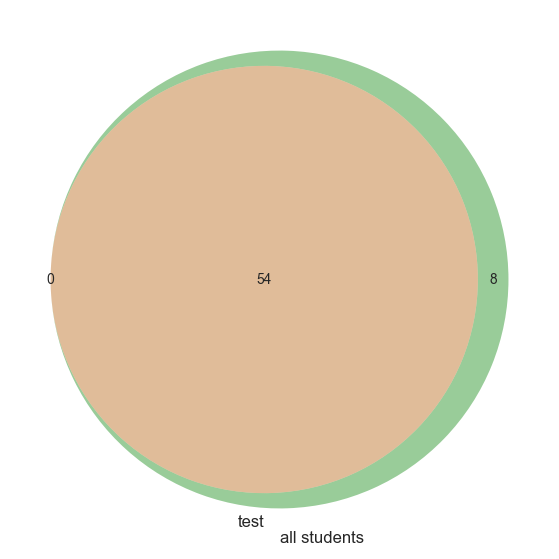

In [167]:
theoretical_test_student_set = set(
    (fio, group)
    for fio, group in theoretical_test_df[['name', 'group']].itertuples(index=False)
)
all_students_set = set(
    (fio, group)
    for fio, group in main_scores_table[['fio', 'group']].itertuples(index=False)
)

print("\nСписок студентов, которые писали проверочную, но их нет в общей таблице:")
pprint(theoretical_test_student_set - all_students_set)

print("\n\nСписок студентов, которые не писали проверочную:")
pprint(all_students_set - theoretical_test_student_set)

venn2(
    subsets=[
        theoretical_test_student_set,
        all_students_set
    ],
    set_labels=['test', 'all students']
);

In [168]:
result = (
    main_scores_table[['fio', 'group']]
    .merge(
        theoretical_test_df[['name', 'group', 'scores_after_penalty']],
        left_on=['fio', 'group'],
        right_on=['name', 'group'],
        how='left'
    )
    [['fio', 'group', 'scores_after_penalty']]
    .sort_values(by=['group', 'fio'], ascending=True)
)
result

,fio,group,scores_after_penalty
0,Котиков Павел,э203,11.0
1,Ардеев Артём,э301,NaN
2,Бабенков Ярослав,э301,11.0
3,Баранов Ярослав,э301,11.0
4,Барановский Герман,э301,11.0
...,...,...,...
57,Животовская Дарья,э406,9.0
58,Захарян Давид,э408,10.0
59,Иващенко Елизавета,э408,10.0
60,Кныш Дарья,э408,10.0


In [169]:
for fio, group, score in result[['fio', 'group', 'scores_after_penalty']].itertuples(index=False):
    print(f"{str(score).replace('.', ',')}" if not np.isnan(score) else '0,0')

11,0
0,0
11,0
11,0
11,0
10,0
11,0
8,0
10,0
11,0
10,0
10,0
9,0
10,0
0,0
11,0
11,0
11,0
8,0
0,0
8,0
0,0
0,0
0,0
11,0
8,0
9,0
2,0
11,0
11,0
11,0
11,0
4,0
11,0
10,0
6,0
0,0
11,0
3,0
9,0
9,0
11,0
9,0
9,0
8,0
11,0
9,0
11,0
7,0
11,0
8,0
11,0
11,0
11,0
11,0
5,0
0,0
9,0
10,0
10,0
10,0
10,0


## bottom